<a href="https://colab.research.google.com/github/parisazeynaly/Space-X-Dataset/blob/main/Space_x_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# **EDA**

In [4]:
df=pd.read_csv('dataset_falcon9.csv')

In [9]:
df['BoosterVersion'].dtype(int)

TypeError: 'numpy.dtypes.ObjectDType' object is not callable

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [11]:
df['Date']

0     2010-06-04
1     2012-05-22
2     2013-03-01
3     2013-09-29
4     2013-12-03
         ...    
85    2020-09-03
86    2020-10-06
87    2020-10-18
88    2020-10-24
89    2020-11-05
Name: Date, Length: 90, dtype: object

In [12]:
df['BoosterVersion']

0     Falcon 9
1     Falcon 9
2     Falcon 9
3     Falcon 9
4     Falcon 9
        ...   
85    Falcon 9
86    Falcon 9
87    Falcon 9
88    Falcon 9
89    Falcon 9
Name: BoosterVersion, Length: 90, dtype: object

In [13]:
set(df['BoosterVersion'])

{'Falcon 9'}

In [14]:
df['PayloadMass']

0      6104.959412
1       525.000000
2       677.000000
3       500.000000
4      3170.000000
          ...     
85    15400.000000
86    15400.000000
87    15400.000000
88    15400.000000
89     3681.000000
Name: PayloadMass, Length: 90, dtype: float64

In [15]:
df['PayloadMass'].min()

350.0

In [16]:
df['PayloadMass'].max()

15600.0

In [17]:
df['PayloadMass'].mean()

6104.959411764707

In [18]:
df['PayloadMass'].std()

4694.671719712727

In [19]:
df['PayloadMass'].describe()

count       90.000000
mean      6104.959412
std       4694.671720
min        350.000000
25%       2510.750000
50%       4701.500000
75%       8912.750000
max      15600.000000
Name: PayloadMass, dtype: float64

array([[<Axes: title={'center': 'FlightNumber'}>,
        <Axes: title={'center': 'PayloadMass'}>,
        <Axes: title={'center': 'Flights'}>],
       [<Axes: title={'center': 'Block'}>,
        <Axes: title={'center': 'ReusedCount'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Class'}>, <Axes: >]], dtype=object)

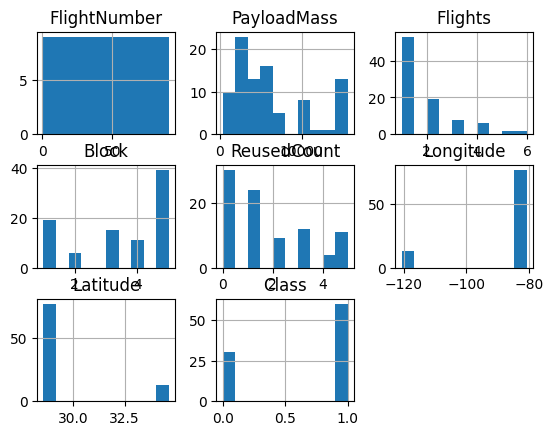

In [20]:
df.hist()

<Axes: >

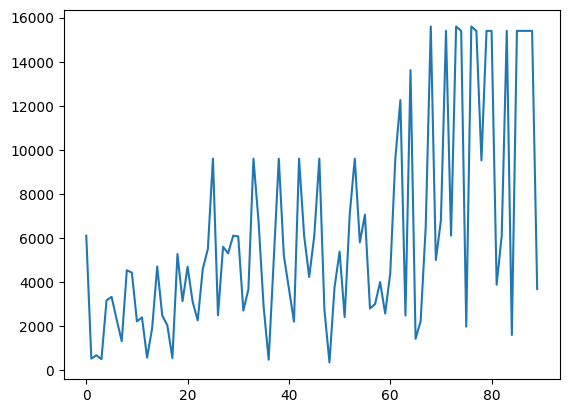

In [21]:
df['PayloadMass'].plot()

In [22]:
df['Orbit']

0      LEO
1      LEO
2      ISS
3       PO
4      GTO
      ... 
85    VLEO
86    VLEO
87    VLEO
88    VLEO
89     MEO
Name: Orbit, Length: 90, dtype: object

In [23]:
set(df['Orbit'])

{'ES-L1', 'GEO', 'GTO', 'HEO', 'ISS', 'LEO', 'MEO', 'PO', 'SO', 'SSO', 'VLEO'}

In [24]:
len(set(df['Orbit']))
# Apply value_counts() on column Orbit
df['Orbit'].value_counts()

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

<Axes: >

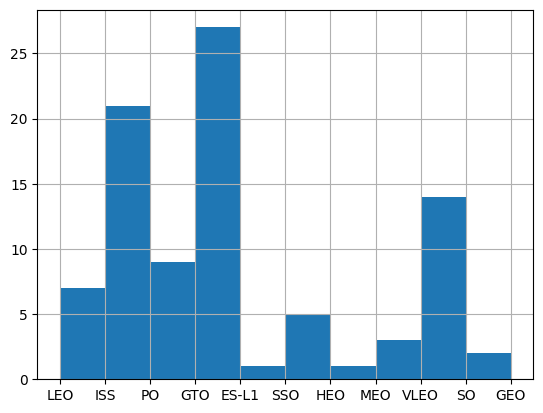

In [25]:
df['Orbit'].hist()

In [26]:
df_success=df[df['Class']==1]

In [27]:
df_fail=df[df['Class']!=1]

In [28]:
df_success.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 6 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    60 non-null     int64  
 1   Date            60 non-null     object 
 2   BoosterVersion  60 non-null     object 
 3   PayloadMass     60 non-null     float64
 4   Orbit           60 non-null     object 
 5   LaunchSite      60 non-null     object 
 6   Outcome         60 non-null     object 
 7   Flights         60 non-null     int64  
 8   GridFins        60 non-null     bool   
 9   Reused          60 non-null     bool   
 10  Legs            60 non-null     bool   
 11  LandingPad      55 non-null     object 
 12  Block           60 non-null     float64
 13  ReusedCount     60 non-null     int64  
 14  Serial          60 non-null     object 
 15  Longitude       60 non-null     float64
 16  Latitude        60 non-null     float64
 17  Class           60 non-null     int64  
dt

In [29]:
df_success['Orbit'].value_counts()

Orbit
GTO      14
ISS      13
VLEO     12
PO        6
LEO       5
SSO       5
MEO       2
ES-L1     1
HEO       1
GEO       1
Name: count, dtype: int64

In [30]:
df_success['Orbit'].value_counts()

Orbit
GTO      14
ISS      13
VLEO     12
PO        6
LEO       5
SSO       5
MEO       2
ES-L1     1
HEO       1
GEO       1
Name: count, dtype: int64

In [31]:
df_fail['Orbit'].value_counts()

Orbit
GTO     13
ISS      8
PO       3
LEO      2
VLEO     2
MEO      1
SO       1
Name: count, dtype: int64

In [32]:
# Apply value_counts() on column LaunchSite
df['LaunchSite'].value_counts()

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

In [33]:
# Apply value_counts() on column Outcome
df['Outcome'].value_counts()

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

In [34]:
df_success['Outcome'].value_counts()

Outcome
True ASDS     41
True RTLS     14
True Ocean     5
Name: count, dtype: int64

In [35]:
df_fail['Outcome'].value_counts()

Outcome
None None      19
False ASDS      6
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

In [36]:
df=df.drop(['BoosterVersion','Serial','Longitude','Latitude'],axis=1)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   Date          90 non-null     object 
 2   PayloadMass   90 non-null     float64
 3   Orbit         90 non-null     object 
 4   LaunchSite    90 non-null     object 
 5   Outcome       90 non-null     object 
 6   Flights       90 non-null     int64  
 7   GridFins      90 non-null     bool   
 8   Reused        90 non-null     bool   
 9   Legs          90 non-null     bool   
 10  LandingPad    64 non-null     object 
 11  Block         90 non-null     float64
 12  ReusedCount   90 non-null     int64  
 13  Class         90 non-null     int64  
dtypes: bool(3), float64(2), int64(4), object(5)
memory usage: 8.1+ KB


Visualize the relationship between Flight Number and Payload Mass

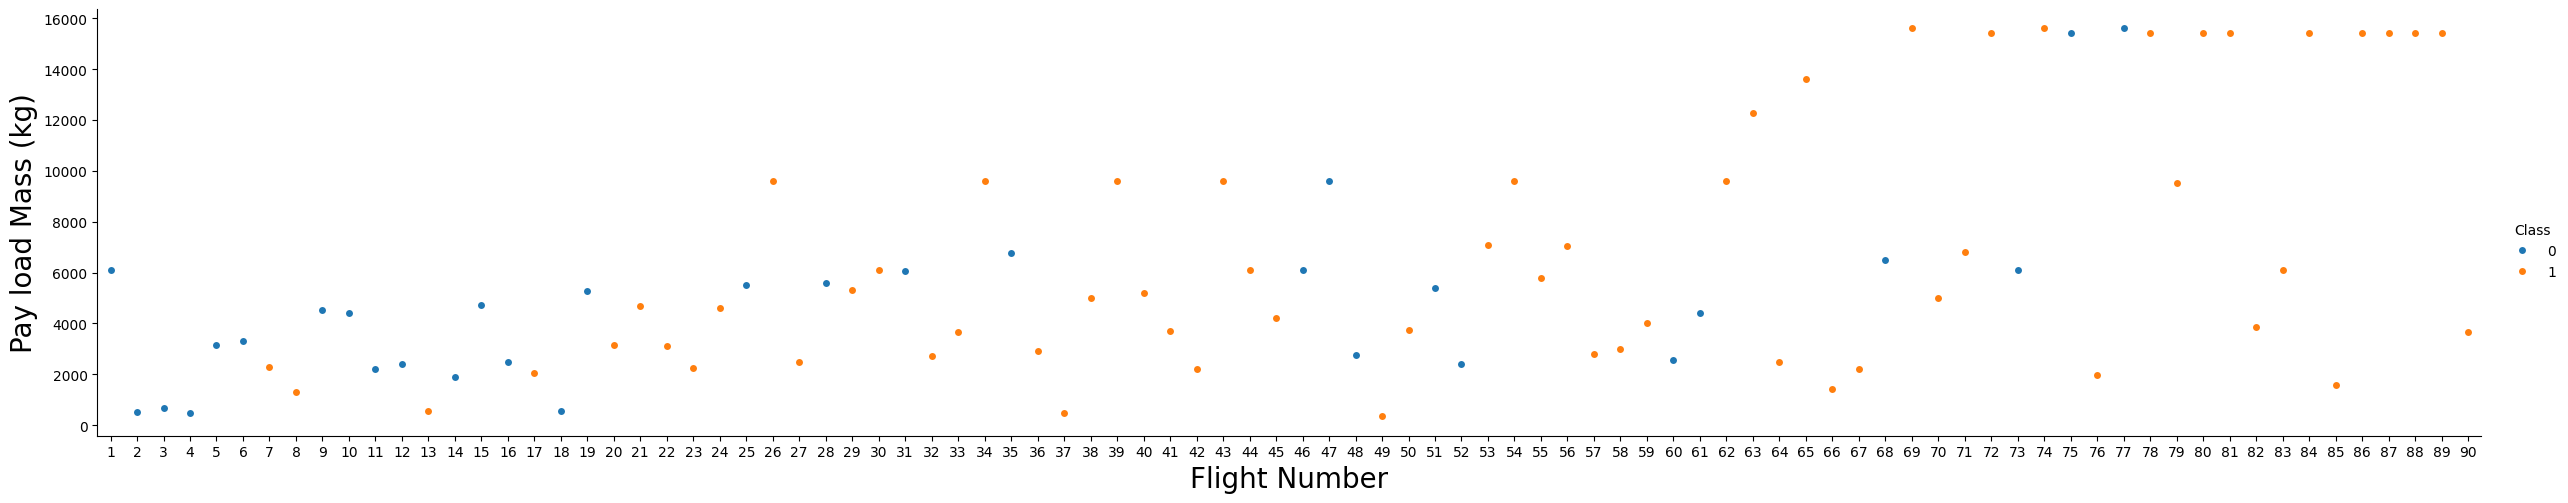

In [38]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Visualize the relationship between Flight Number and Launch Site


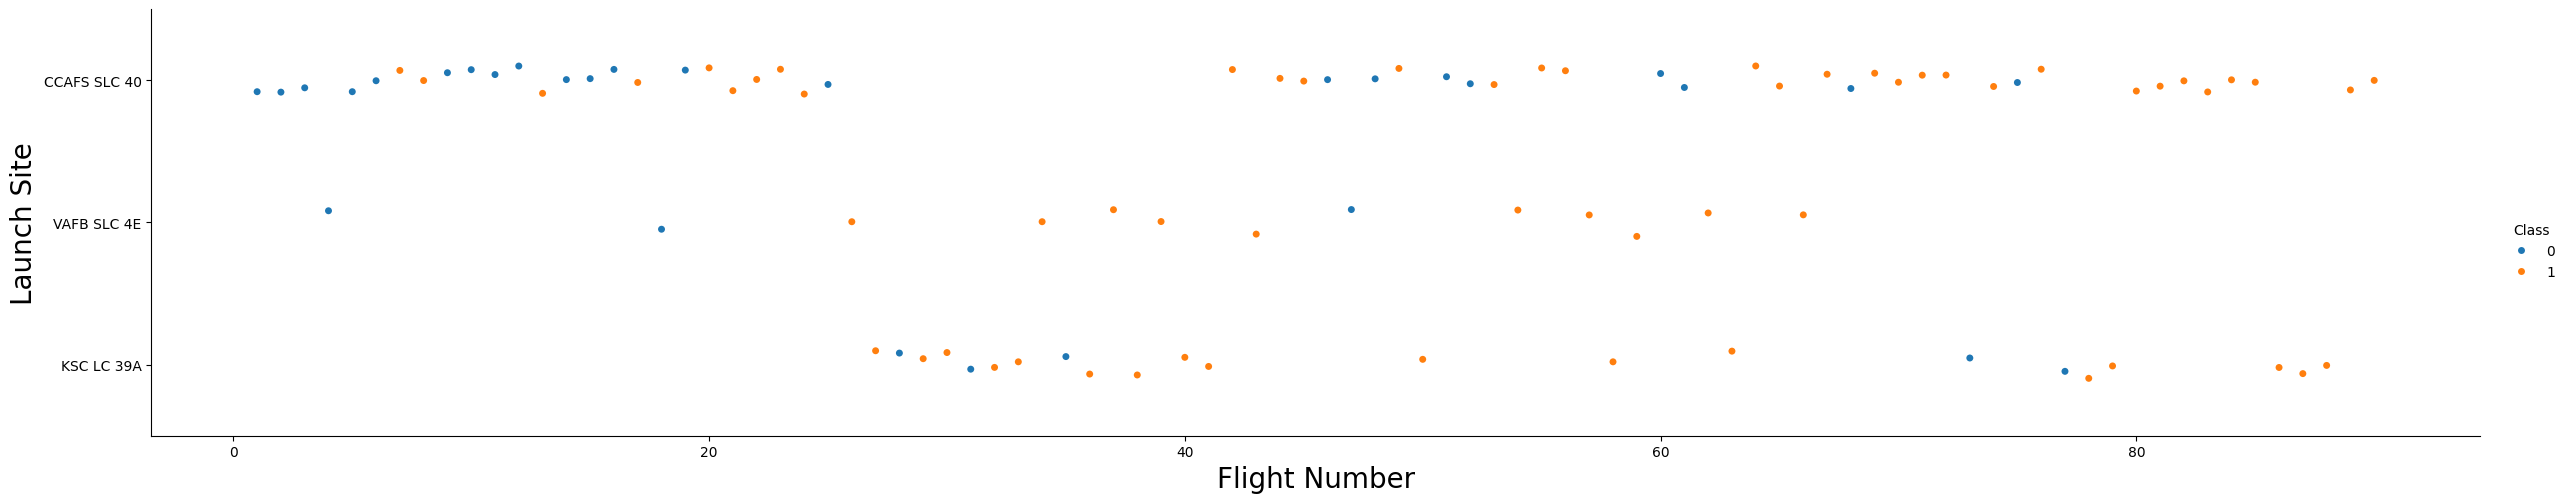

In [39]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Visualize the relationship between Payload and Launch Site


Text(31.078941666666665, 0.5, 'Pay load Mass (kg)')

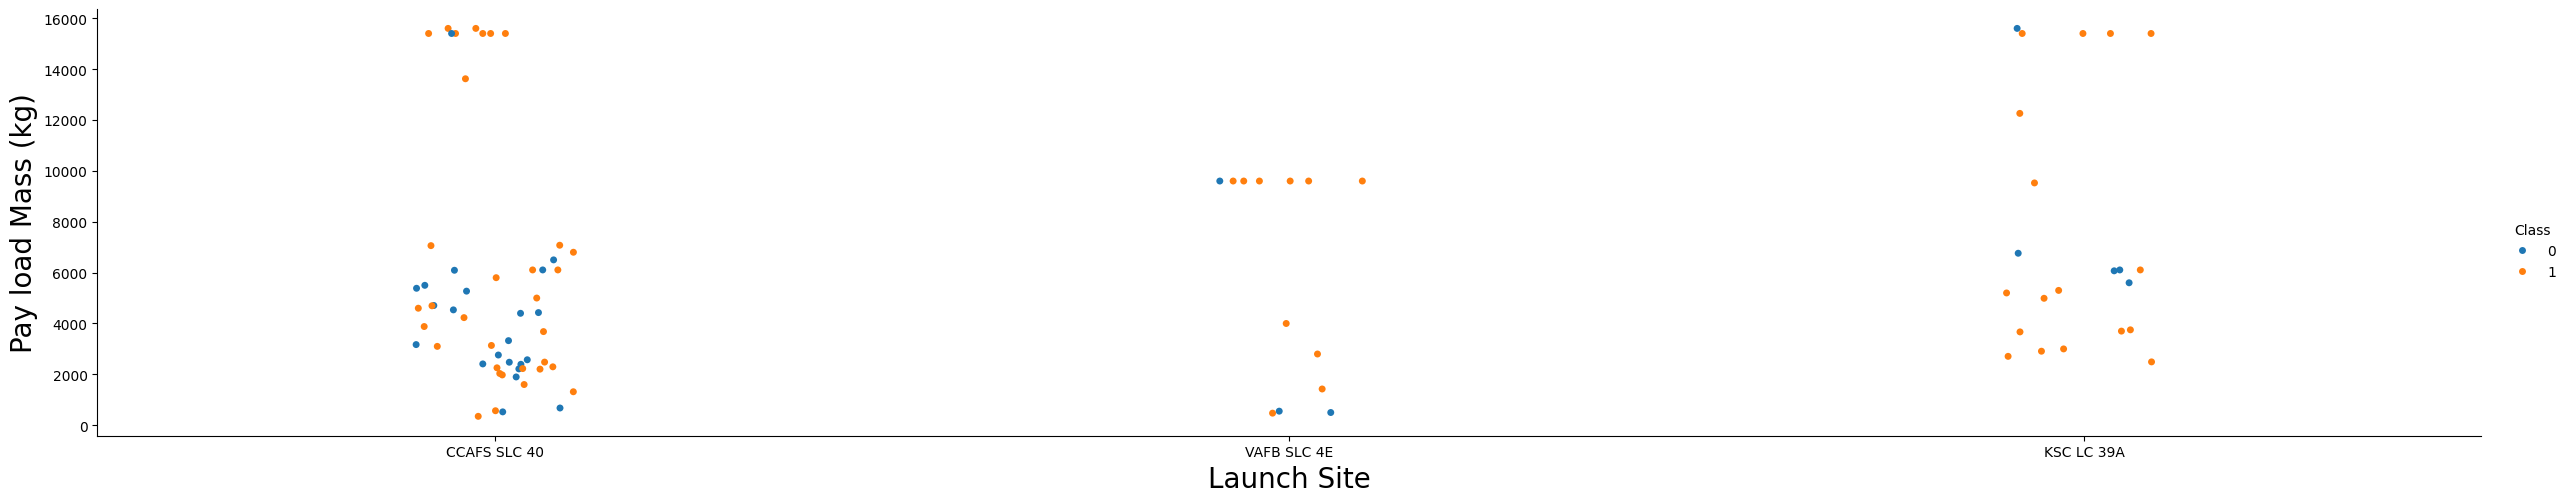

In [41]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("Launch Site",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)

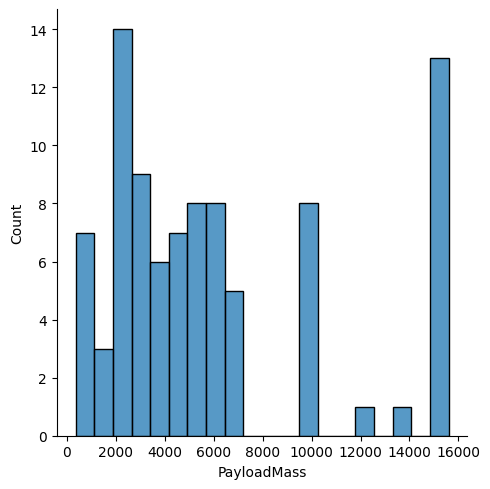

In [42]:
sns.displot(df['PayloadMass'],bins=20)

<Axes: xlabel='LaunchSite', ylabel='count'>

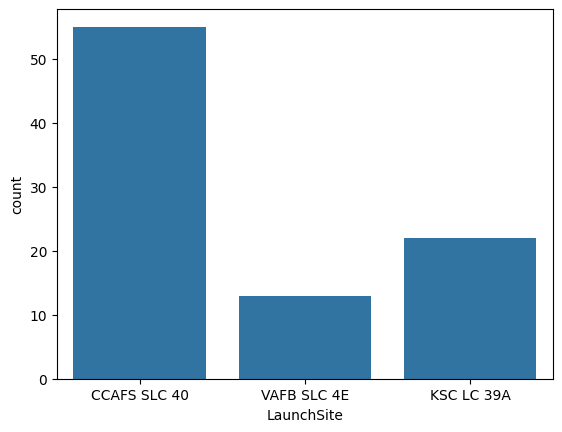

In [43]:
sns.countplot(x='LaunchSite',data=df)

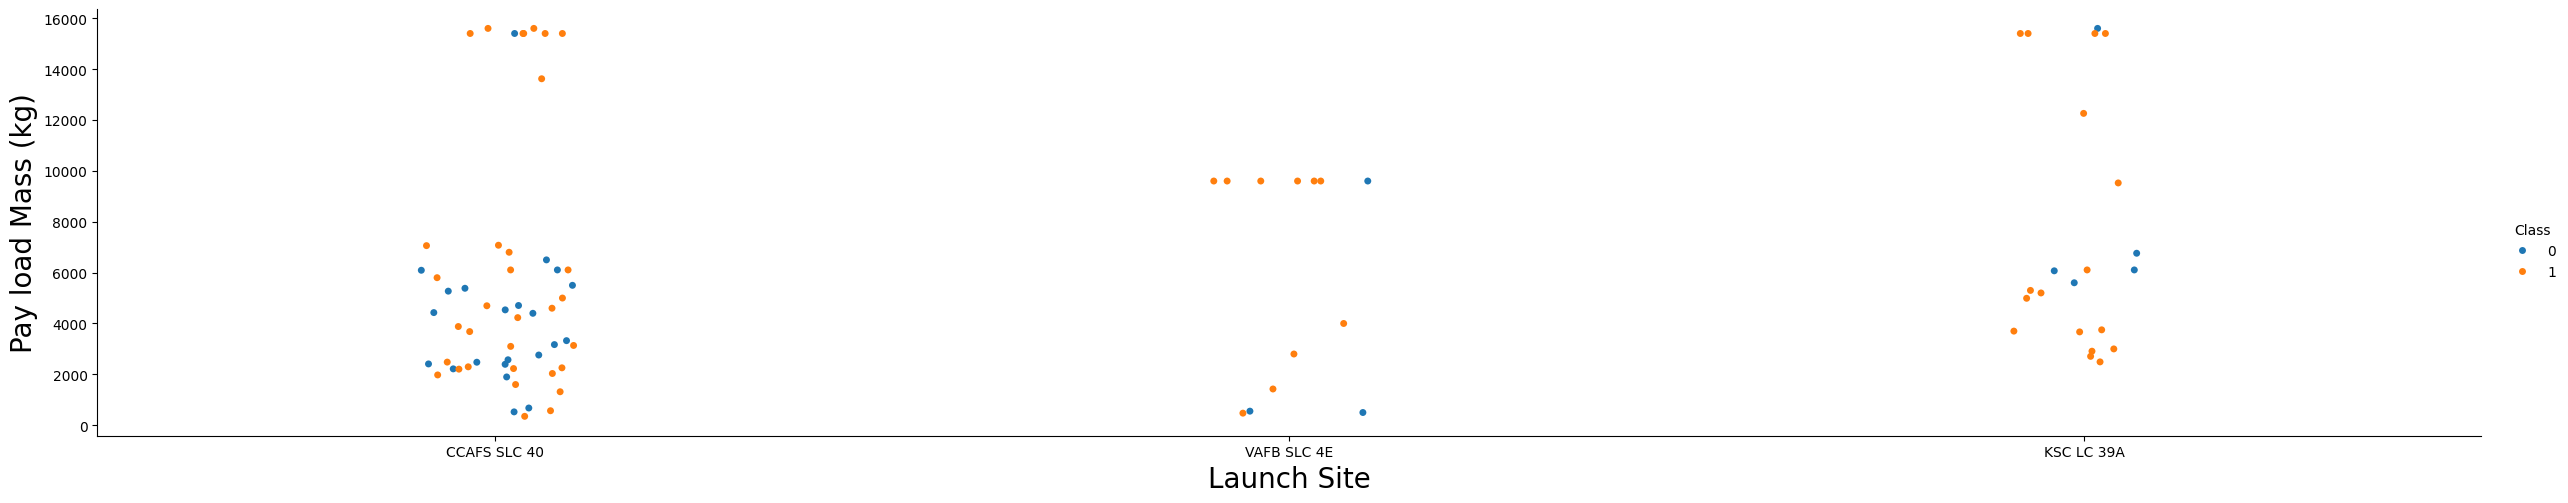

In [40]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("Launch Site",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

In [3]:
import seaborn as sns


In [6]:
df_missing=pd.read_excel('missing_dataset_falcon9.xlsx')

In [6]:
df_missing

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,NaN,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,NaN,None None,1,False,False,False,NaN,1,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5,2,B1060,-80.577366,28.561857,1


In [7]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    90 non-null     int64         
 1   Date            90 non-null     datetime64[ns]
 2   BoosterVersion  90 non-null     object        
 3   PayloadMass     81 non-null     float64       
 4   Orbit           90 non-null     object        
 5   LaunchSite      86 non-null     object        
 6   Outcome         90 non-null     object        
 7   Flights         90 non-null     int64         
 8   GridFins        90 non-null     bool          
 9   Reused          90 non-null     bool          
 10  Legs            90 non-null     bool          
 11  LandingPad      64 non-null     object        
 12  Block           90 non-null     int64         
 13  ReusedCount     90 non-null     int64         
 14  Serial          90 non-null     object        
 15  Longitud

In [8]:
df_missing.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        9
Orbit              0
LaunchSite         4
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
Class              0
dtype: int64

In [16]:
# df_missing['PayloadMass']= df_missing['PayloadMass'].replace(np.nan,df_missing['PayloadMass'].mean)

KeyError: 'PayloadMass'

In [9]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    90 non-null     int64         
 1   Date            90 non-null     datetime64[ns]
 2   BoosterVersion  90 non-null     object        
 3   PayloadMass     81 non-null     float64       
 4   Orbit           90 non-null     object        
 5   LaunchSite      86 non-null     object        
 6   Outcome         90 non-null     object        
 7   Flights         90 non-null     int64         
 8   GridFins        90 non-null     bool          
 9   Reused          90 non-null     bool          
 10  Legs            90 non-null     bool          
 11  LandingPad      64 non-null     object        
 12  Block           90 non-null     int64         
 13  ReusedCount     90 non-null     int64         
 14  Serial          90 non-null     object        
 15  Longitud

In [10]:
df_missing['LaunchSite'].value_counts()

LaunchSite
CCAFS SLC 40    53
KSC LC 39A      20
VAFB SLC 4E     13
Name: count, dtype: int64

In [11]:
df_missing=df_missing['LaunchSite'].replace(np.nan,'CCAFS SLC 40')

In [12]:
df_missing.info()

<class 'pandas.core.series.Series'>
RangeIndex: 90 entries, 0 to 89
Series name: LaunchSite
Non-Null Count  Dtype 
--------------  ----- 
90 non-null     object
dtypes: object(1)
memory usage: 848.0+ bytes


In [13]:
df_row=df_missing.dropna(axis=0)
df_row.info()

<class 'pandas.core.series.Series'>
Index: 90 entries, 0 to 89
Series name: LaunchSite
Non-Null Count  Dtype 
--------------  ----- 
90 non-null     object
dtypes: object(1)
memory usage: 1.4+ KB


In [ ]:
# df_col=df_missing.dropna(axis=1)
# df_col.info()

In [17]:
# payload_mean=df_missing['PayloadMass'].mean()
# payload_mean

# **Preprocessing**


# **Machine Learning**





In [18]:
! pip install scikit-Learn


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
X_train = df.drop(columns='Class', axis=1)
Y_train = df['Class']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, stratify=Y_train, random_state=101)

**Train the model**

In [22]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel=LogisticRegression()


In [ ]:
# logmodel.fit(X_train,Y_train)

k nearest